<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA4P2_S2_PreFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Aug  8 09:24:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [3]:
!pip install https://download.pytorch.org/whl/cu92/torchvision-0.6.0%2Bcu92-cp36-cp36m-linux_x86_64.whl
!pip install https://download.pytorch.org/whl/cu92/torch-1.5.0%2Bcu92-cp36-cp36m-linux_x86_64.whl


     |████████████████████████████████| 6.5MB 6.3MB/s 
     |████████████████████████████████| 752.0MB 24kB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 603.7MB 29kB/s 
  Found existing installation: torch 1.5.0
    Uninstalling torch-1.5.0:
      Successfully uninstalled torch-1.5.0


In [4]:
import torch, torchvision
print(torch.__version__, torchvision.__version__)

1.5.0+cu92 0.6.0+cu92


In [5]:
%run '/content/drive/My Drive/EVA4/default_setup.py'

Installing mandatory requirements
Installing albumentations
System imports completed


  pip install torch-lr-finder -v --global-option="amp"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dev imports completed


In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [7]:
!cp /content/drive/My\ Drive/EVA4/Flying\ Birds.zip /content/FlyingBirds.zip
!cp /content/drive/My\ Drive/EVA4/Large\ QuadCopters-20200723T085054Z-001.zip /content/LargeQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Small\ QuadCopters.zip /content/SmallQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Winged\ Drones-20200723T075457Z-001.zip /content/WingedDrones.zip

!ls -1 /content/*zip |while read line; do unzip -q $line;done

Flying Birds/9107bb987e9dec52c1052a64689866f7.jpg  bad CRC 41dc7636  (should be 4e9b6933)


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/EVA4/S2_Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/EVA4/S2_Test.csv')
print(df_train.count()[0], df_test.count()[0])

17154 4289


### Training Scripts

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0003981071705534973, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":256}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0003981071705534973
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  256
Final Hyperparameters
             dropout : 0.1 
          batch_size : 256 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0003981071705534973 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
          

### Rotate and Flip

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0003981071705534973, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":256}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0003981071705534973
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  256
Final Hyperparameters
             dropout : 0.1 
          batch_size : 256 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0003981071705534973 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
          

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0003981071705534973, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":256}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0003981071705534973
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  256
Final Hyperparameters
             dropout : 0.1 
          batch_size : 256 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0003981071705534973 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
          

### Freezing all layers except last

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0003981071705534973, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":100, "batch_size":128}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0003981071705534973
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  100
Setting  batch_size  =  128
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 100 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0003981071705534973 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
        

### 3 Layers unfrozen

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0039810717055349725, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":64}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0039810717055349725
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  64
Final Hyperparameters
             dropout : 0.1 
          batch_size : 64 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0039810717055349725 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
           s

### 4 Layers unfrozen

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0039810717055349725, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":64, "unfreeze_layer":4}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0039810717055349725
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  64
Setting  unfreeze_layer  =  4
Final Hyperparameters
             dropout : 0.1 
          batch_size : 64 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0039810717055349725 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
          

### 4 Layers Unfrozen + CutOut

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0039810717055349725, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":64, "unfreeze_layer":4}'

  pip install torch-lr-finder -v --global-option="amp"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0039810717055349725
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  64
Setting  unfreeze_layer  =  4
Final Hyperparameters
             dropout : 0.1 
          batch_size : 64 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
        

### Inferencing

In [9]:
from RekogNizer import traintest, dataloader, lrfinder, basemodelclass
import torch.optim as optim
import torch.nn as nn
def resize_bg(h,w,mean,std):
    return A.Compose([
        A.Resize(h,w,always_apply=True,p=1),        
        A.Normalize(
            mean=mean, std=std
            ),
        A.pytorch.ToTensor(),
        #A.ToGray(always_apply=True,p=1)
        #A.CLAHE(p=1),
        #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
    ], p=1)

def resize_bg_train(h,w,mean,std):
    return A.Compose([
        A.Resize(h,w,always_apply=True,p=1),
        A.Cutout(num_holes=2,max_h_size=8,max_w_size=8,always_apply=True,p=1,fill_value=[0.4819*255, 0.4713*255, 0.4409*255]),
        A.Normalize(
            mean=mean, std=std
            ),
        A.pytorch.ToTensor(),
        #A.ToGray(always_apply=True,p=1)
        #A.CLAHE(p=1),
        #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
    ], p=1)




transform_train = resize_bg_train(224,224, [0.485, 0.456, 0.406],[0.229, 0.224, 0.225] )
transform_test = resize_bg(224,224, [0.485, 0.456, 0.406],[0.229, 0.224, 0.225] )

default_model = torch.hub.load('pytorch/vision:v0.7.0', 'mobilenet_v2', pretrained=True)
#model_new = basemodelclass.MobileNetV2Mod(default_model, 4)
#model_new = basemodelclass.MobileNetV2New(default_model, 4)
model_new = basemodelclass.MobileNetV24C(default_model, 4)

#my_model,acc = traintest.model_builder2(model_new, weights_path="/content/drive/My Drive/EVA4/model_saves/model-df537c2965.h5") ##-->89.55
#my_model,acc = traintest.model_builder2(model_new, weights_path="/content/drive/My Drive/EVA4/model_saves/model-df537c2965.h5") ## --> 89.9

### Min Params ### 
#my_model,acc = traintest.model_builder2(model_new, weights_path="/content/drive/My Drive/EVA4/model_saves/model-2ff23f1603.h5")
#my_model,acc = traintest.model_builder2(model_new, weights_path="/content/drive/My Drive/EVA4/model_saves/model-1ec5741927.h5")
my_model,acc = traintest.model_builder2(model_new, weights_path="/content/drive/My Drive/EVA4/model_saves/model-6dcbdacb8c.h5")
print(acc)

#updatable_params = [ param[1] for param in model_new.named_parameters() if(not re.match('core',param[0])) ]
updatable_params = my_model.unfreeze_core_layer(3)
#updatable_params = model_new.parameters()
optimizer=optim.SGD(updatable_params, lr=0.001, momentum=0.9)

#optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum, weight_decay=config.weight_decay)

#optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion=nn.NLLLoss
trainset = dataloader.QDFDataSet('/content/drive/My Drive/EVA4/S2_Train.csv',transform=transform_train)
trainloader = dataloader.get_dataloader(trainset, 32, shuffle=True, num_workers=4)
testset = dataloader.QDFDataSet('/content/drive/My Drive/EVA4/S2_Test.csv',transform=transform_test)
testloader = dataloader.get_dataloader(testset, 32, shuffle=False, num_workers=4)



Downloading: "https://github.com/pytorch/vision/archive/v0.7.0.zip" to /root/.cache/torch/hub/v0.7.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth



89.85777570529261


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Exception: tensor([1], device='cuda:0') tensor([0], device='cuda:0')
Accuracy of    LQ : 70 %
Accuracy of Birds : 98 %
Accuracy of    WD : 91 %
Accuracy of    SQ : 80 %
Predicted:4288 vs Actual:4289 counts mismatch


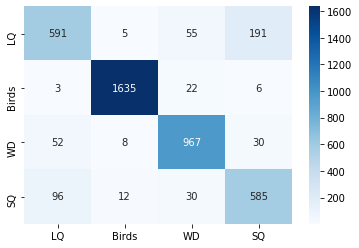

In [11]:
from RekogNizer import traintest
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")

classes_abv = ['LQ', 'Birds', 'WD','SQ']
class_accuracy_dict,conf_matrix = traintest.get_classacc_conf_matrix(my_model.to(device), 
                                                testloader, 
                                                classes_abv, 
                                                device=device)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


479
(479,)
88.83189554674749 0.32612562204580203


<Figure size 720x720 with 0 Axes>

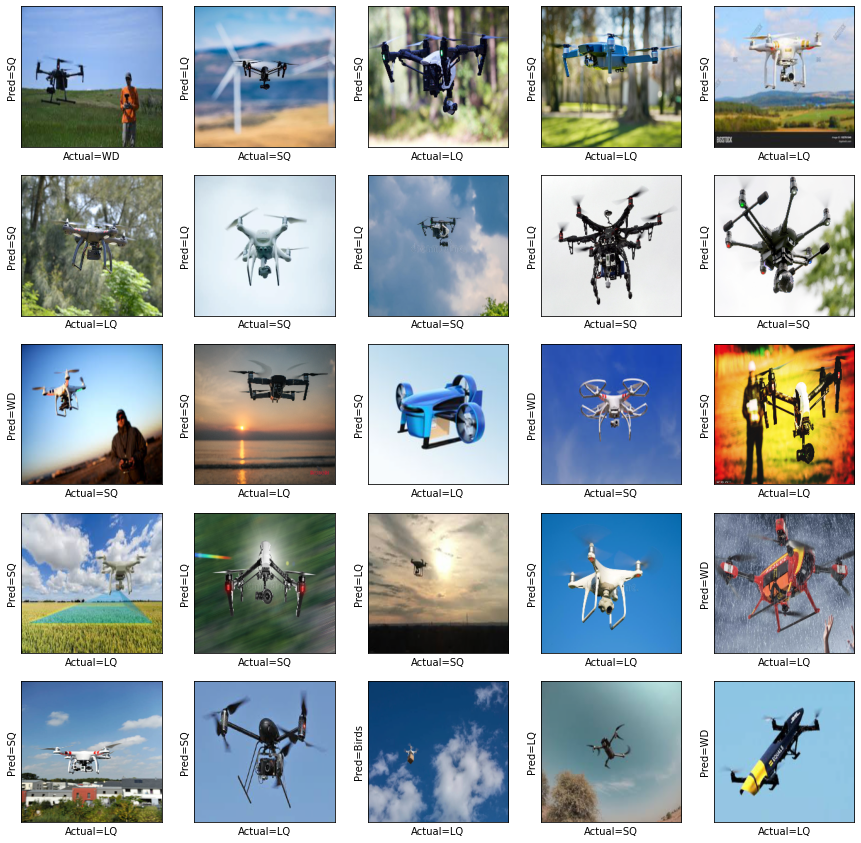

In [13]:
erro_img, preds, actuals = traintest.show_misclassfied_images(my_model, testloader, classes_abv)

### Misclassified Images classwise


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


479
(479,)
88.83189554674749 0.32612562204580203


<Figure size 720x720 with 0 Axes>

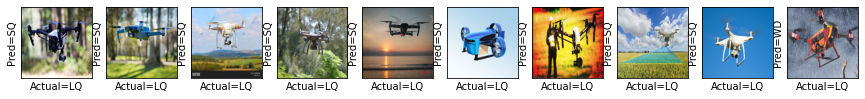

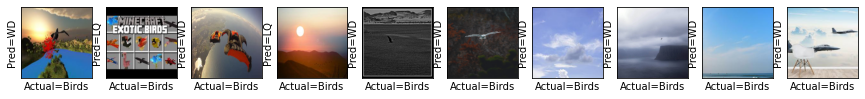

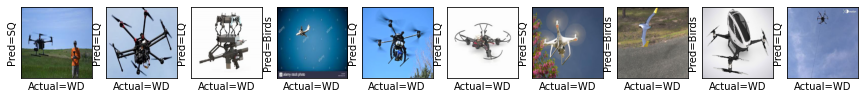

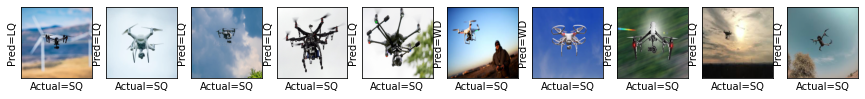

In [15]:
erro_img, preds, actuals = traintest.show_misclassfied_images_classwise(my_model, testloader, classes_abv)

### Upload to AWS S3

In [16]:
from RekogNizer import awsutils
traced_model = torch.jit.trace(my_model.to("cpu"), torch.randn(1,3,224,224))
torch.jit.save(traced_model, '/content/CustomMobileNetV2_8889.pt')
awsutils.upload_model_to_s3('rekog-eva4s1','/content/CustomMobileNetV2_8889.pt',os.path.basename('/content/CustomMobileNetV2_8889.pt'))

### Querying from AWS
Query URL: https://onlsab2xqb.execute-api.ap-south-1.amazonaws.com/dev/classify


In [18]:
!curl -X POST \
  https://onlsab2xqb.execute-api.ap-south-1.amazonaws.com/dev/classify \
  -H 'cache-control: no-cache' \
  -H 'content-type: multipart/form-data' \
  -F file1=@'/content/Flying Birds/EagleImage_11.jpg'

{"file": "file1", "predicted": "That seems to be Flying Birds"}